In [1]:
import os
import shutil
import random
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

# Set the seed for reproducibility

In [3]:
random.seed(42)

# Define the paths

In [4]:
base_dir = "C:/Users/danis/Coding/crop-disease-recognition-cnn"
dataset_dir = os.path.join(base_dir, "PlantVillage-Dataset")
preprocessing_dir = os.path.join(base_dir, "Preprocessing")

# Create preprocessing directory if it doesn't exist

In [5]:
if not os.path.exists(preprocessing_dir):
    os.makedirs(preprocessing_dir)

# Split ratios

In [6]:
train_ratio = 0.85
val_ratio = 0.10
test_ratio = 0.05

# Function to split data

In [7]:
def split_data(source, dest, category):
    # Create directories for training, validation, and testing
    train_dir = os.path.join(dest, 'train', category)
    val_dir = os.path.join(dest, 'val', category)
    test_dir = os.path.join(dest, 'test', category)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Get all images
    images = glob(os.path.join(source, category, "*.jpg"))
    random.shuffle(images)
    
    # Split the data
    train_split = int(len(images) * train_ratio)
    val_split = int(len(images) * (train_ratio + val_ratio))
    
    train_images = images[:train_split]
    val_images = images[train_split:val_split]
    test_images = images[val_split:]

    # Function to copy and rename images
    def copy_and_rename_images(images, dest_dir, prefix):
        for i, image_path in enumerate(images):
            image_name = os.path.basename(image_path)
            new_name = f"{prefix}_{i+1}.jpg"
            new_path = os.path.join(dest_dir, new_name)
            shutil.copy(image_path, new_path)
    
    # Copy and rename images
    copy_and_rename_images(train_images, train_dir, category)
    copy_and_rename_images(val_images, val_dir, category)
    copy_and_rename_images(test_images, test_dir, category)
    
    return len(train_images), len(val_images), len(test_images), len(images)


# Directories for Tomato and Potato

In [8]:
tomato_dir = os.path.join(dataset_dir, "Tomato")
potato_dir = os.path.join(dataset_dir, "Potato")

# Categories

In [9]:
tomato_categories = ["Tomato_Bacterial_spot", "Tomato_Early_blight", "Tomato_Healthy", "Tomato_Late_blight",
                    "Tomato_Leaf_Mold", "Tomato_Septoria_leaf_spot", "Tomato_Target_Spot",
                    "Tomato_Tomato_mosaic_virus", "Tomato_Tomato_Yellow_Leaf_Curl_Virus", "Tomato_Two-spotted_spider_mites"]

potato_categories = ["Potato_Early_blight", "Potato_Healthy", "Potato_Late_blight"]

# Splitting the data and collecting stats

In [10]:
data_stats = {
    "Category": [],
    "Train": [],
    "Validation": [],
    "Test": [],
    "Total": []
}

# Process Tomato categories

In [11]:
for category in tomato_categories:
    train_count, val_count, test_count, total_count = split_data(tomato_dir, preprocessing_dir, category)
    data_stats["Category"].append(category)
    data_stats["Train"].append(train_count)
    data_stats["Validation"].append(val_count)
    data_stats["Test"].append(test_count)
    data_stats["Total"].append(total_count)

# Process Potato categories

In [12]:
for category in potato_categories:
    train_count, val_count, test_count, total_count = split_data(potato_dir, preprocessing_dir, category)
    data_stats["Category"].append(category)
    data_stats["Train"].append(train_count)
    data_stats["Validation"].append(val_count)
    data_stats["Test"].append(test_count)
    data_stats["Total"].append(total_count)

# Create a DataFrame from the stats

In [13]:
df_stats = pd.DataFrame(data_stats)

# Display the DataFrame

In [14]:
print(df_stats)

                                Category  Train  Validation  Test  Total
0                  Tomato_Bacterial_spot   1807         213   107   2127
1                    Tomato_Early_blight    850         100    50   1000
2                         Tomato_Healthy   1352         159    80   1591
3                     Tomato_Late_blight   1621         191    96   1908
4                       Tomato_Leaf_Mold    809          95    48    952
5              Tomato_Septoria_leaf_spot   1505         177    89   1771
6                     Tomato_Target_Spot   1193         140    71   1404
7             Tomato_Tomato_mosaic_virus    317          37    19    373
8   Tomato_Tomato_Yellow_Leaf_Curl_Virus   4553         536   268   5357
9        Tomato_Two-spotted_spider_mites   1424         168    84   1676
10                   Potato_Early_blight    850         100    50   1000
11                        Potato_Healthy    129          15     8    152
12                    Potato_Late_blight    850    

# Visualization

# Bar chart for data split

In [34]:
short_labels = {
    "Tomato_Bacterial_spot": "T_Bacterial_spot",
    "Tomato_Early_blight": "T_Early_blight",
    "Tomato_Healthy": "T_Healthy",
    "Tomato_Late_blight": "T_Late_blight",
    "Tomato_Leaf_Mold": "T_Leaf_Mold",
    "Tomato_Septoria_leaf_spot": "T_Septoria",
    "Tomato_Target_Spot": "T_Target_Spot",
    "Tomato_Tomato_mosaic_virus": "T_Mosaic_virus",
    "Tomato_Tomato_Yellow_Leaf_Curl_Virus": "T_Yellow_Curl",
    "Tomato_Two-spotted_spider_mites": "T_Spider_mites",
    "Potato_Early_blight": "P_Early_blight",
    "Potato_Healthy": "P_Healthy",
    "Potato_Late_blight": "P_Late_blight"
}

In [35]:
df_stats['Category'] = df_stats['Category'].map(short_labels)

<Figure size 1000x600 with 0 Axes>

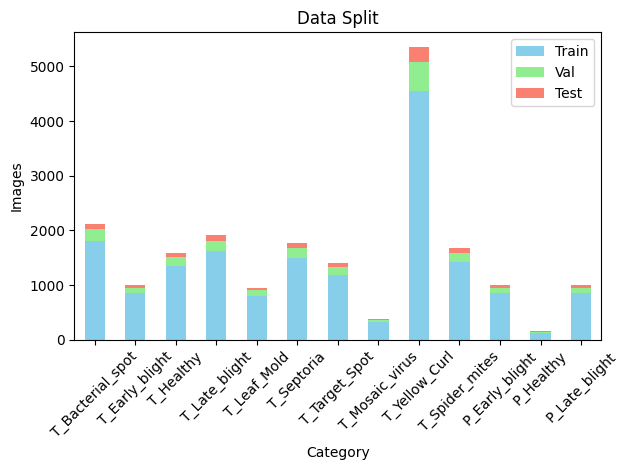

In [36]:
plt.figure(figsize=(10, 6))
df_stats.plot(kind='bar', x='Category', y=['Train', 'Validation', 'Test'], stacked=True, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Data Split')
plt.xlabel('Category')
plt.ylabel('Images')
plt.legend(['Train', 'Val', 'Test'], loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart for overall data split

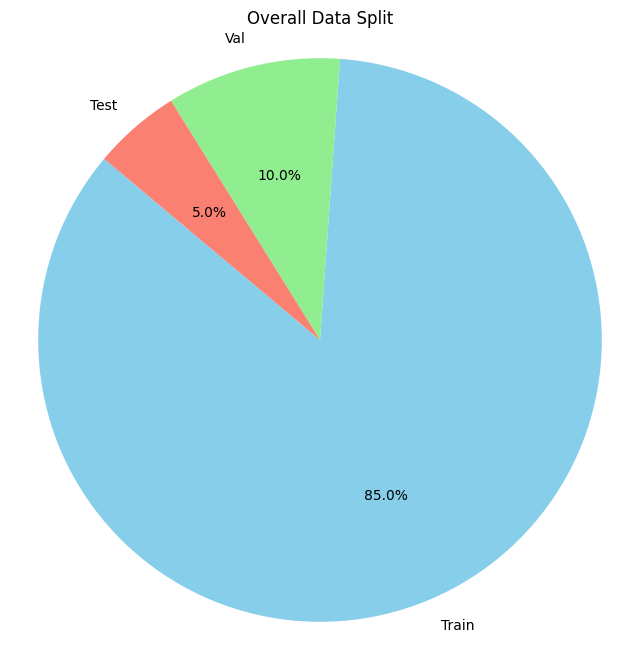

In [26]:
plt.figure(figsize=(8, 8))
sizes = [df_stats['Train'].sum(), df_stats['Validation'].sum(), df_stats['Test'].sum()]
labels = ['Train', 'Val', 'Test']
colors = ['skyblue', 'lightgreen', 'salmon']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Overall Split')
plt.show()

# Mapping images for verification

In [27]:
def plot_sample_images(base_dir, category, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, ax in enumerate(axes):
        img_path = random.choice(glob(os.path.join(base_dir, "*.jpg")))
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(os.path.basename(img_path)[:10])  # Show only first 10 characters of file name
        ax.axis('off')
    plt.suptitle(f'{category} Samples', fontsize=14)
    plt.show()

# Plot sample images for Tomato and Potato categories

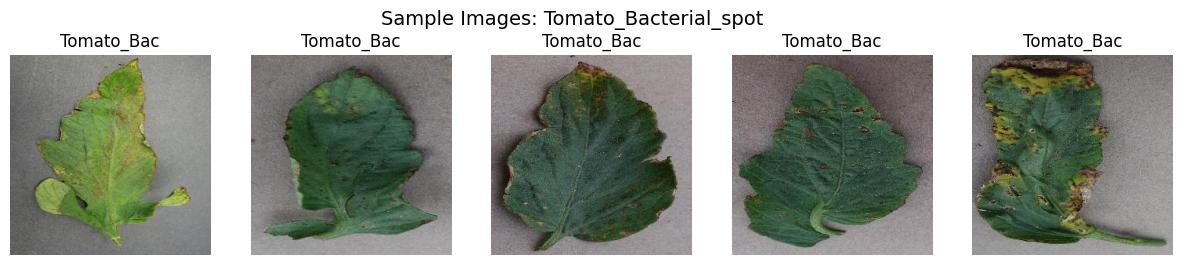

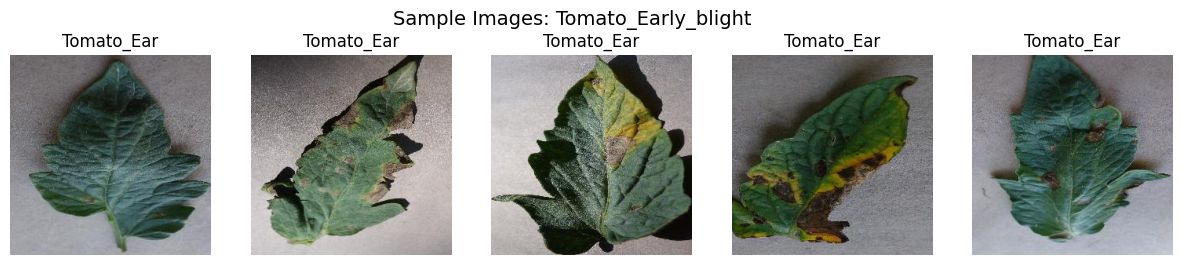

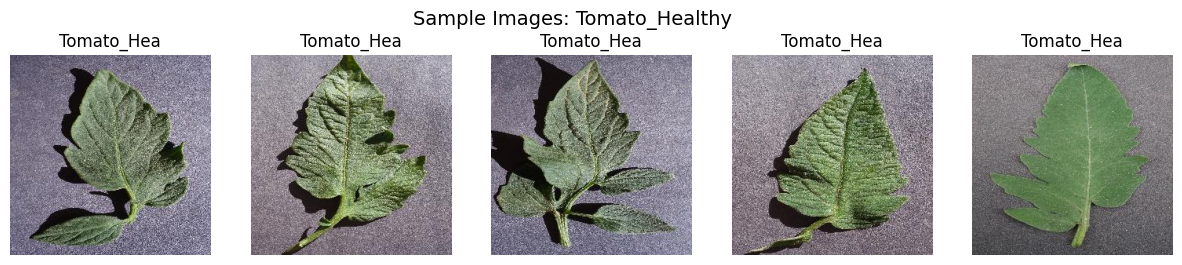

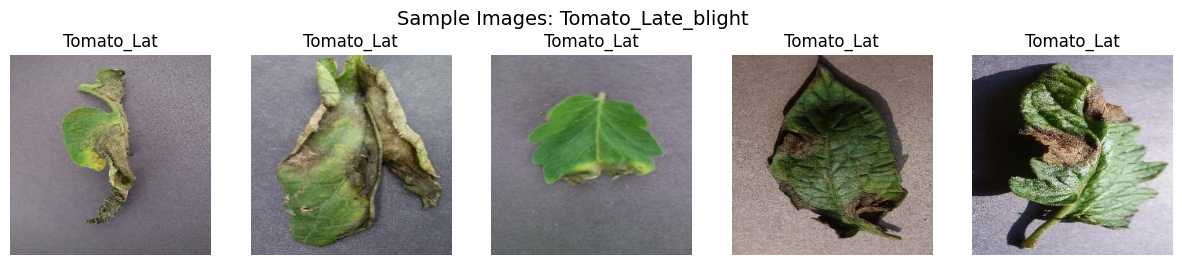

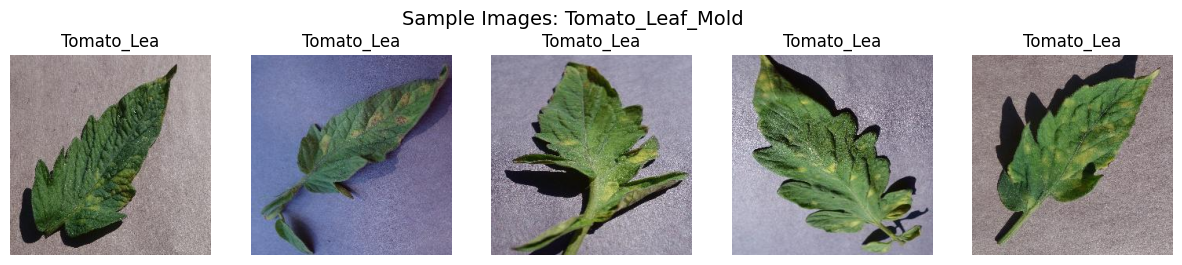

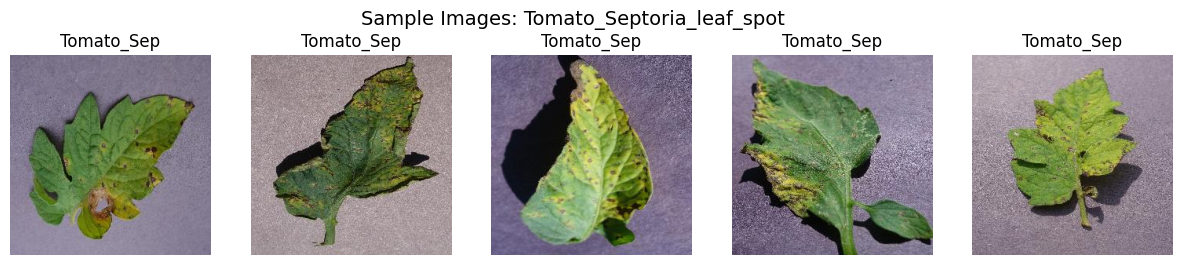

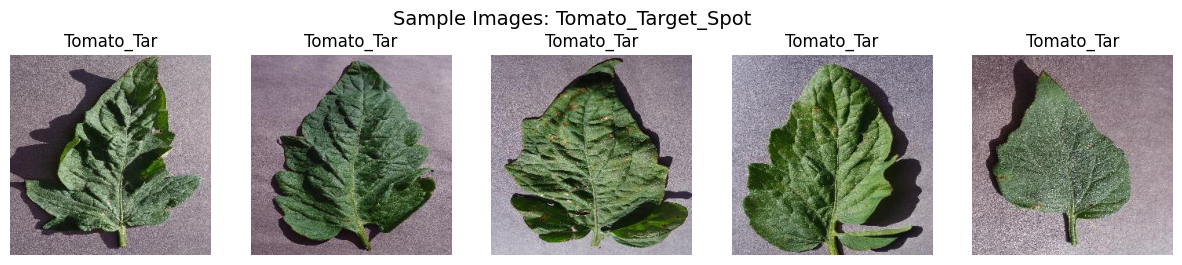

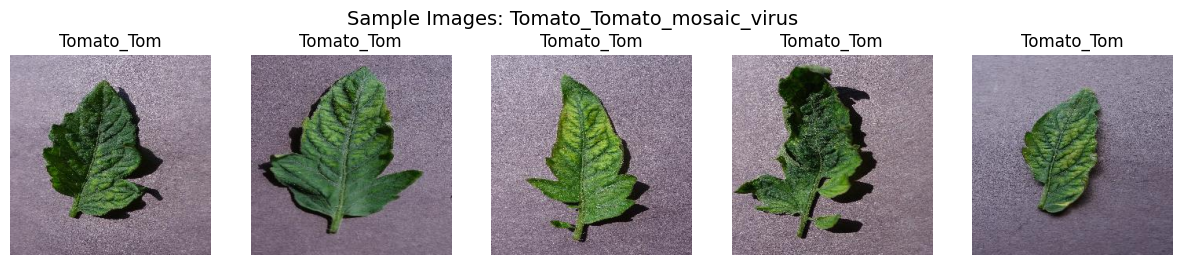

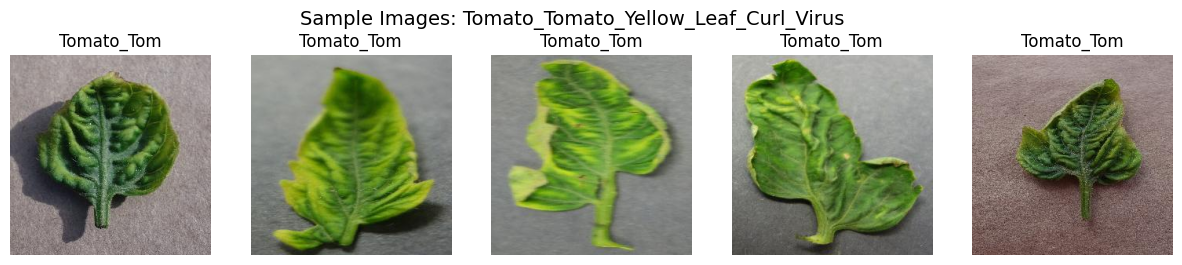

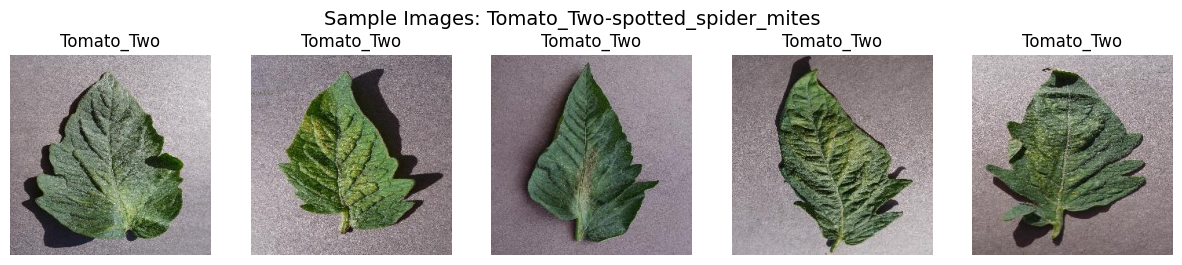

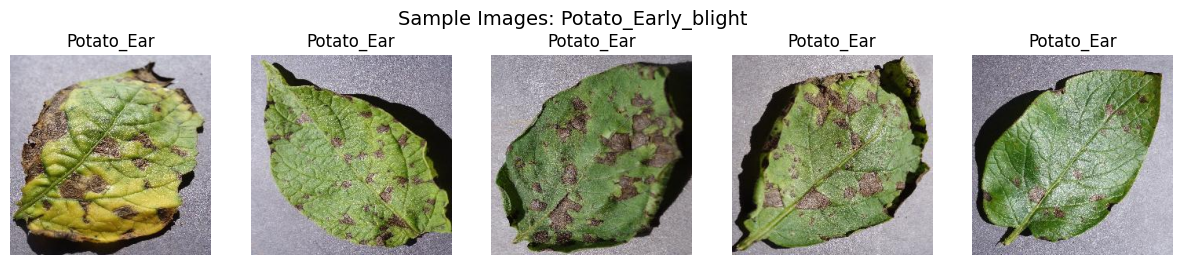

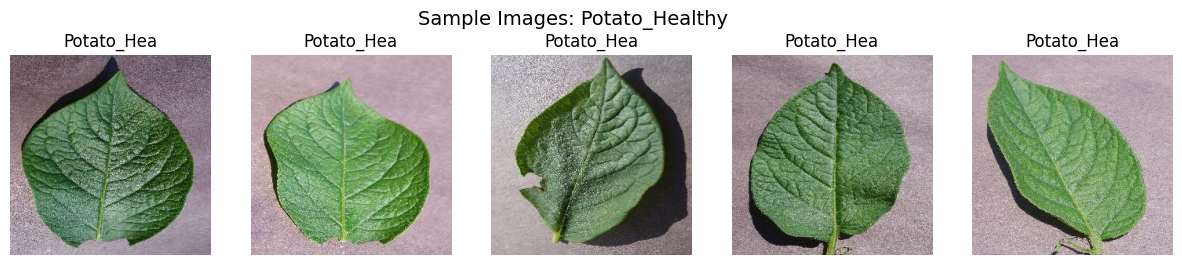

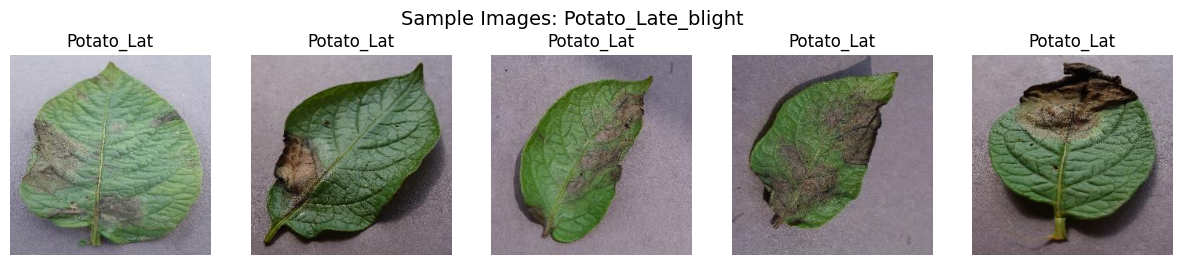

In [28]:
for category in tomato_categories:
    plot_sample_images(os.path.join(preprocessing_dir, 'train', category), category)

for category in potato_categories:
    plot_sample_images(os.path.join(preprocessing_dir, 'train', category), category)